In [401]:
import pandas as pd
import numpy as np

path = '/Users/Bingumalla Likith/Desktop/Projects/Machine_learning_projects/new_file.csv'
data_frame = pd.read_csv(path)
data_frame.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### *_Columns and their meanings_*
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [402]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [403]:
data_columns = list(data_frame.columns[:-1])
target_columns = 'MEDV'
data = data_frame[data_columns]
target = data_frame[target_columns]

In [404]:
# Used to find the outliers in the data (Box-plots)
import matplotlib.pyplot as plt 
import seaborn as sns

def Display_outliers(data , target):
    _ , axes = plt.subplots(nrows = 2 , ncols = 7, figsize = (20 , 10))

    for index in range(13):
        sns.set_theme(style=  "white", font_scale=1)
        sns.boxplot(y = data_columns[index], data = data , ax = axes[index // 7][index % 7])
    sns.boxplot(y = 'MEDV' , data = pd.DataFrame(target) , ax = axes[1][6])
    plt.tight_layout(pad = 0.4 , w_pad=0.5 , h_pad=5.0)

<Axes: >

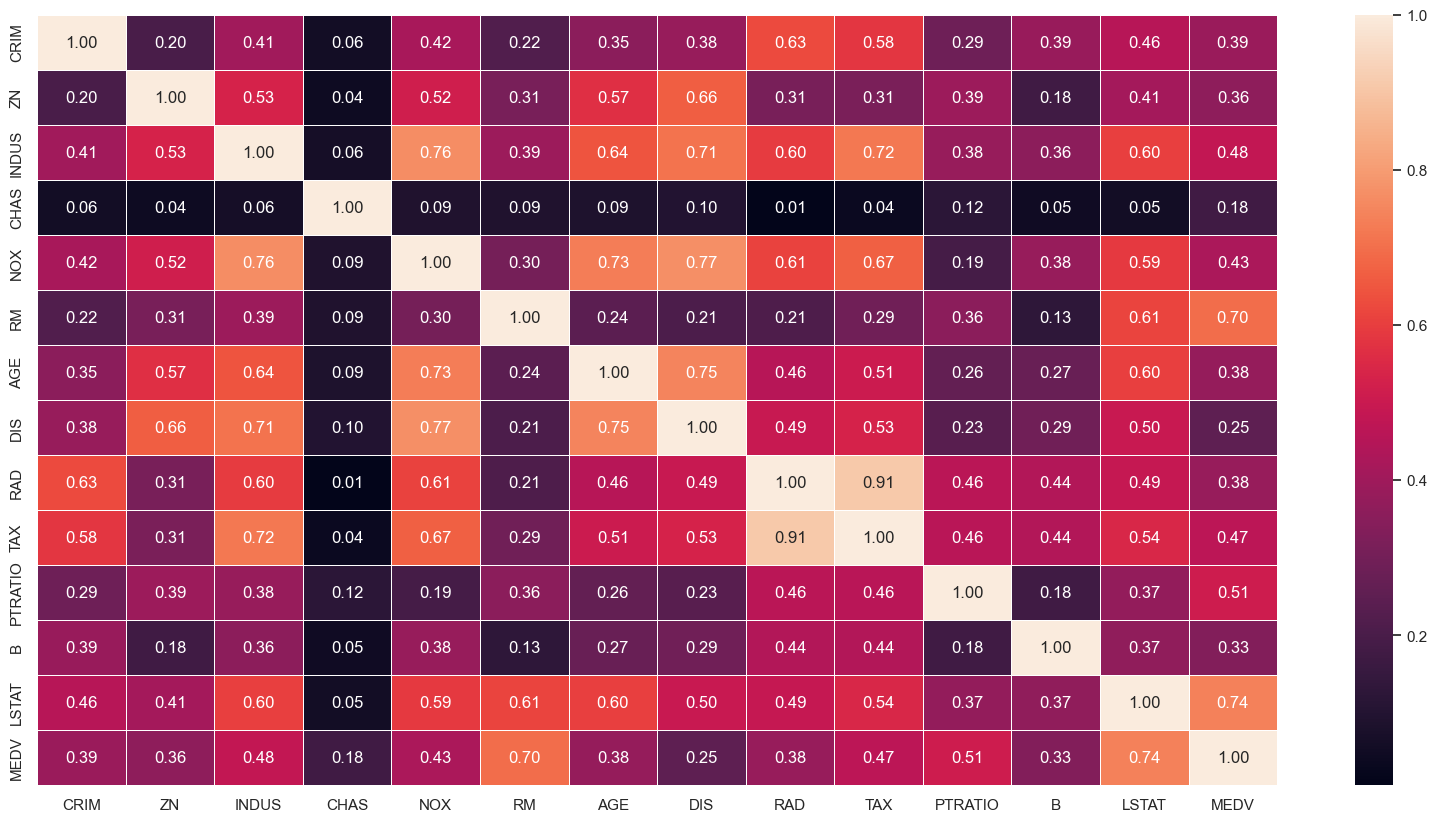

In [405]:
corr_mat = data_frame.corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(corr_mat.abs() , annot = True , fmt = '.2f', linewidth = .5)

In [406]:
# To Remove Outliers in Target Values
data = data[~(target >= 50)]
target = target[~(target >= 50)]

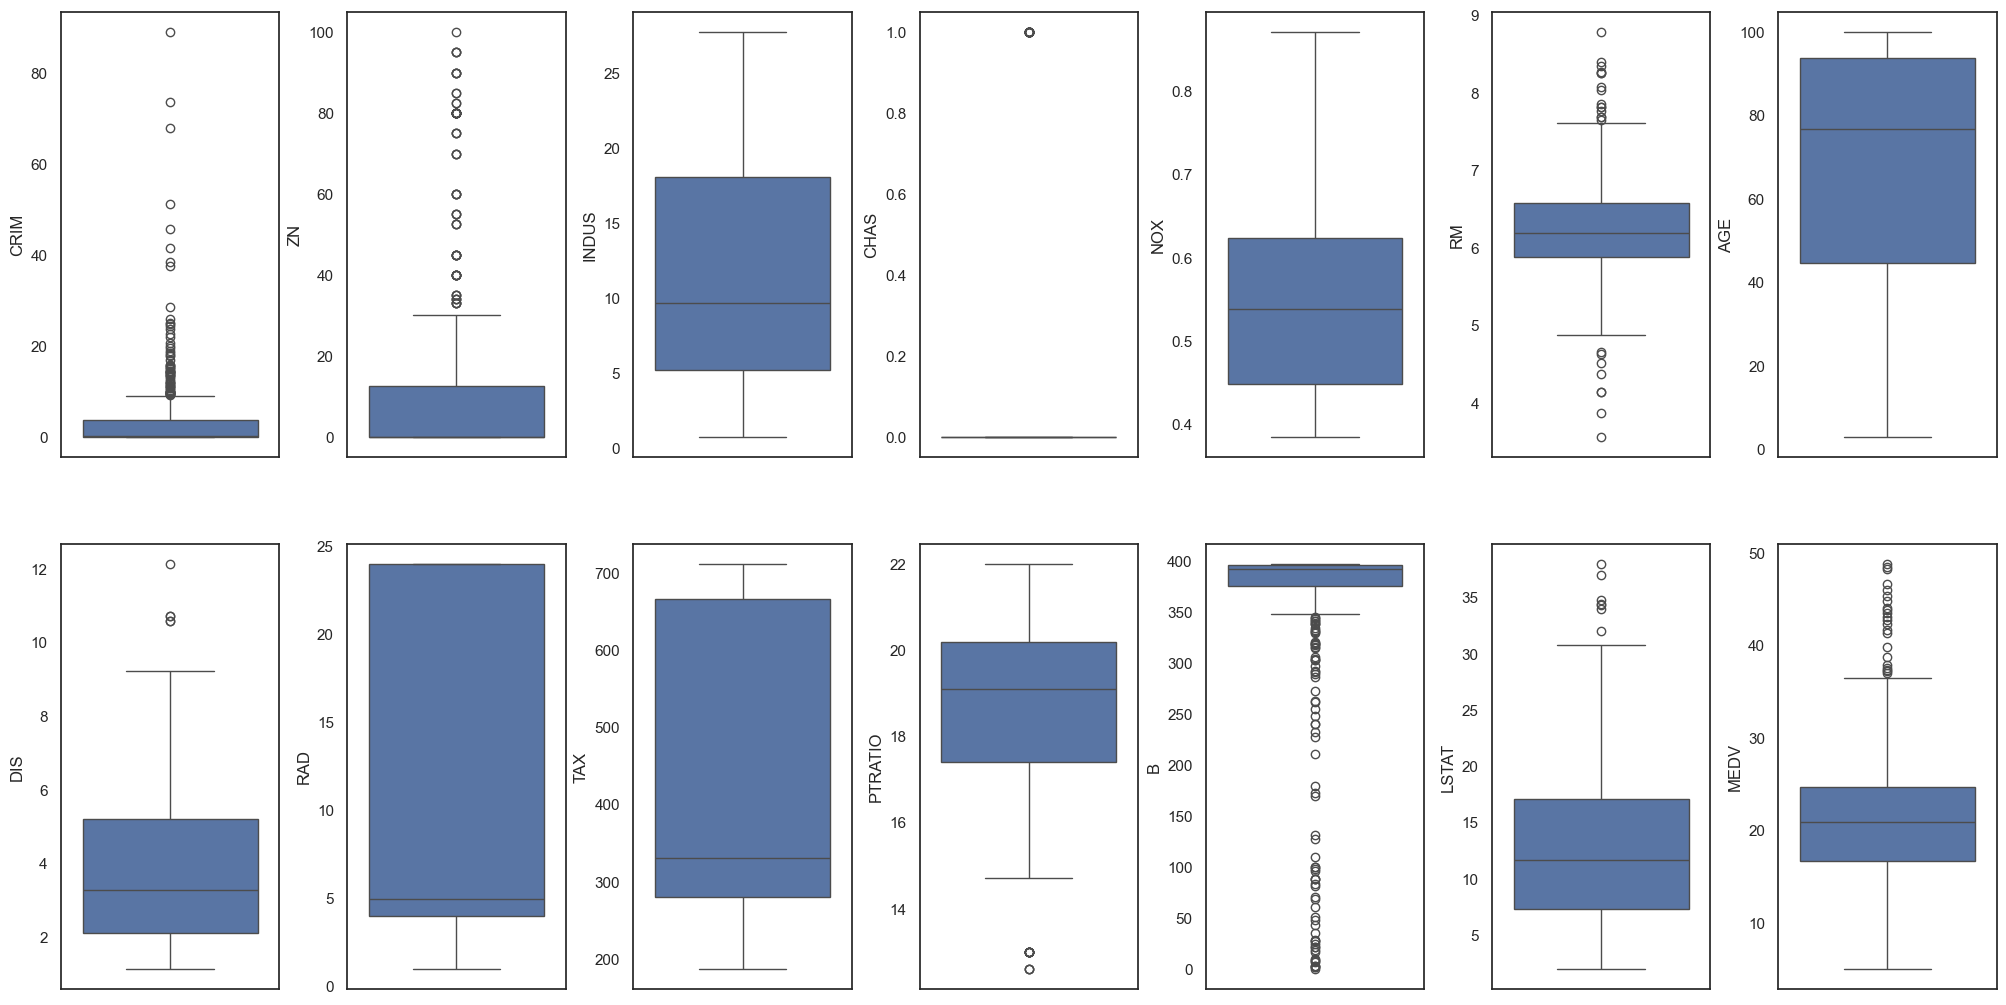

In [407]:
Display_outliers(data , target)

In [408]:
# Finding attributes that are having high correlation with the Median house price
highly_correlated = []
for index in corr_mat.index:
    if np.abs(corr_mat.loc[index , 'MEDV']) >= 0.4 and index != 'MEDV':
        highly_correlated.append(index)
highly_correlated
highly_correlated.append('AGE')

In [409]:
data = data[highly_correlated]

<Axes: >

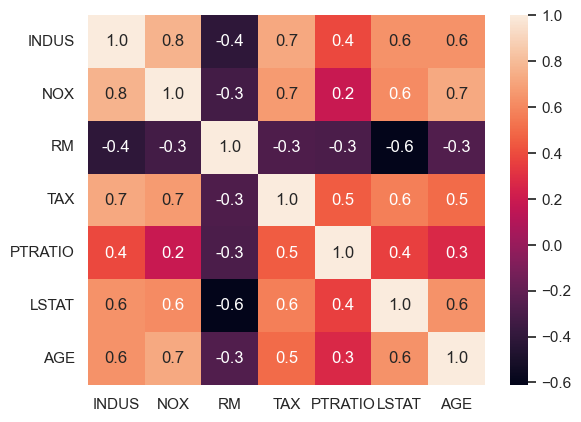

In [410]:
sns.heatmap(data.corr() , annot = True , fmt = '.1f')

In [411]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [412]:
x_train , x_test, y_train ,y_test = train_test_split(np.array(data) , target , test_size = 0.15)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [413]:
def train_model(model , name , train_data , train_target):
    x_train , x_val , y_train , y_val = train_test_split(train_data , train_target , shuffle = True , random_state=42)
    model.fit(x_train , y_train)

    predict_train = model.predict(x_train)
    predict_val = model.predict(x_val)

    print(f'{name}:')
    print(f'The training error is : {mean_absolute_error(predict_train , y_train)}')
    print(f'The validation error is : {mean_absolute_error(predict_val , y_val)}\n')


In [414]:
n_models = {'lr' : LinearRegression() , 'svr' : SVR() , 'dt_reg' : DecisionTreeRegressor() , 'rand_reg' : RandomForestRegressor() , 'gt_reg' : GradientBoostingRegressor() , 'kn_reg' : KNeighborsRegressor() , 'xgb_reg' : XGBRegressor()}

for name , model in n_models.items():
    train_model(model , name , x_train , y_train)

lr:
The training error is : 3.204678857420953
The validation error is : 2.8306578613718605

svr:
The training error is : 2.832921032069386
The validation error is : 2.5789599740051363

dt_reg:
The training error is : 0.0
The validation error is : 3.0250000000000004

rand_reg:
The training error is : 0.8229262820512832
The validation error is : 2.1692115384615396

gt_reg:
The training error is : 1.0524942968854527
The validation error is : 2.0525831042448552

kn_reg:
The training error is : 2.125192307692308
The validation error is : 2.397692307692308

xgb_reg:
The training error is : 0.021157212746448988
The validation error is : 2.0090965720323415



In [420]:
model = n_models['xgb_reg']

params = {'n_estimators': range(100 , 300), 'learning_rate': np.linspace(0.001 , 1 , 10), 'min_child_weight' : range(1 , 10), 'max_depth': range(1 , 10) , 'reg_lambda' : range(1 , 10) , 'reg_alpha' : range(1 , 10)}
cv_reg =  RandomizedSearchCV(model , params ,scoring = 'neg_mean_absolute_error' , n_iter = 30 ,n_jobs = -1 , cv = 100 , verbose = 3 , return_train_score=True)

cv_reg.fit(x_train , y_train)

Fitting 100 folds for each of 30 candidates, totalling 3000 fits
[CV 1/100] END learning_rate=0.556, max_depth=5, min_child_weight=9, n_estimators=145, reg_alpha=4, reg_lambda=5;, score=(train=-0.543, test=-2.543) total time=   0.1s
[CV 3/100] END learning_rate=0.556, max_depth=5, min_child_weight=9, n_estimators=145, reg_alpha=4, reg_lambda=5;, score=(train=-0.586, test=-3.026) total time=   0.1s
[CV 2/100] END learning_rate=0.556, max_depth=5, min_child_weight=9, n_estimators=145, reg_alpha=4, reg_lambda=5;, score=(train=-0.549, test=-1.233) total time=   0.1s
[CV 6/100] END learning_rate=0.556, max_depth=5, min_child_weight=9, n_estimators=145, reg_alpha=4, reg_lambda=5;, score=(train=-0.560, test=-0.860) total time=   0.1s
[CV 4/100] END learning_rate=0.556, max_depth=5, min_child_weight=9, n_estimators=145, reg_alpha=4, reg_lambda=5;, score=(train=-0.511, test=-2.399) total time=   0.1s
[CV 9/100] END learning_rate=0.556, max_depth=5, min_child_weight=9, n_estimators=145, reg_alph

RandomizedSearchCV(cv=100,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256...
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                                        'max_depth': range(1, 10),
                                        'min_child_weight': range(1, 10),
                                        'n_estimators': range(100, 300),
                                        'reg_alpha': range(1, 10),
                                        'reg_lambda': range(1, 10)},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=3)

In [421]:
print(f'The best score over all 10 folds of cross-validation by the best model {cv_reg.best_score_}')

The best score over all 10 folds of cross-validation by the best model -1.9196126712322235


In [422]:
cv_reg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.223, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=285, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=4,
             reg_lambda=8, ...)

In [423]:
final_model = cv_reg.best_estimator_

kf = KFold(n_splits=15)
scores = cross_val_score(final_model , x_train , y_train , cv = kf , scoring = 'neg_mean_absolute_error')
print(f'The Mean training MSE is {abs(scores.mean()):.2f}')

The Mean training MSE is 2.00


In [424]:
prediction = final_model.predict(x_test)
print(f'The Testing error is : {mean_absolute_error(prediction , y_test)}')

The Testing error is : 7.138302032367604
